In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def graficar(base_image,thresh,opening,sure_bg,dist_transform,sure_fg,unknown,markers,watershed):
  # Show the pictures
  plt.rcParams["figure.figsize"] = (20,15)
  # First row
  fig, ax = plt.subplots(3, 3)
  ax[0][0].imshow(base_image)
  ax[0][0].set_title("Original")
  ax[0][1].imshow(thresh, cmap = "gray")
  ax[0][1].set_title("Otsu")
  ax[0][2].imshow(opening, cmap = "gray")
  ax[0][2].set_title("2 Iterations of Closing + 1 Iteration of Opening")

  # Second row
  ax[1][0].imshow(sure_bg, cmap = "gray")
  ax[1][0].set_title("Sure Background (Black region)")
  ax[1][1].imshow(dist_transform, cmap = "gray")
  ax[1][1].set_title("Distance Transform")
  ax[1][2].imshow(sure_fg, cmap = "gray")
  ax[1][2].set_title("Sure Foreground")

  # Third row
  ax[2][0].imshow(unknown, cmap = "gray")
  ax[2][0].set_title("Unkown ")
  ax[2][1].imshow(markers, cmap = "jet")
  ax[2][1].set_title("Markers")
  ax[2][2].imshow(base_image)
  ax[2][2].imshow(watershed, cmap = "winter",alpha=0.3)
  ax[2][2].set_title("Overlapped")

In [ ]:
def stock_pastillas(path):
  image = cv2.imread(path)
  image = cv2.resize(image, (550,550))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  base_image = np.copy(image)
  grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Aplicamos Otsu
  ret, thresh = cv2.threshold(grayscale,0,255,cv2.THRESH_OTSU)
  # usamos closing y opening para eliminar ruido
  structuring_element = np.ones((3,3),np.uint8)
  closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, structuring_element, iterations = 2)
  opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, structuring_element, iterations = 1)

  # Find the area that belong to the background
  sure_bg = cv2.dilate(opening, structuring_element, iterations=1)

  # Find the area of the foreground
  # DistanceTransform replaces the value of each pixel with its distance to the nearest background pixel
  # It Receives as parameters: a binary image, function of distance, kernel size
  dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
  ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,cv2.THRESH_BINARY)
  sure_fg = np.uint8(sure_fg)

  # Find the unknown region
  unknown = cv2.subtract(sure_bg,sure_fg)

  # Label initial regions (markers)
  ret, markers = cv2.connectedComponents(sure_fg)
  # Add one to all tags so the safe background isn't confused with the tag marker 1
  markers = markers+1
  # Define the unknown region with zero pixels
  markers[unknown==255] = 0


  # Apply Watershed Segmentation
  watershed = cv2.watershed(image,markers)
  # Watershed assigns the value -1 to region-bounding pixels, so
  # we will assign the color red
  image[watershed == -1] = [255,0,0]

  graficar(base_image,thresh,opening,sure_bg,dist_transform,sure_fg,unknown,markers,watershed)

  return watershed.max()

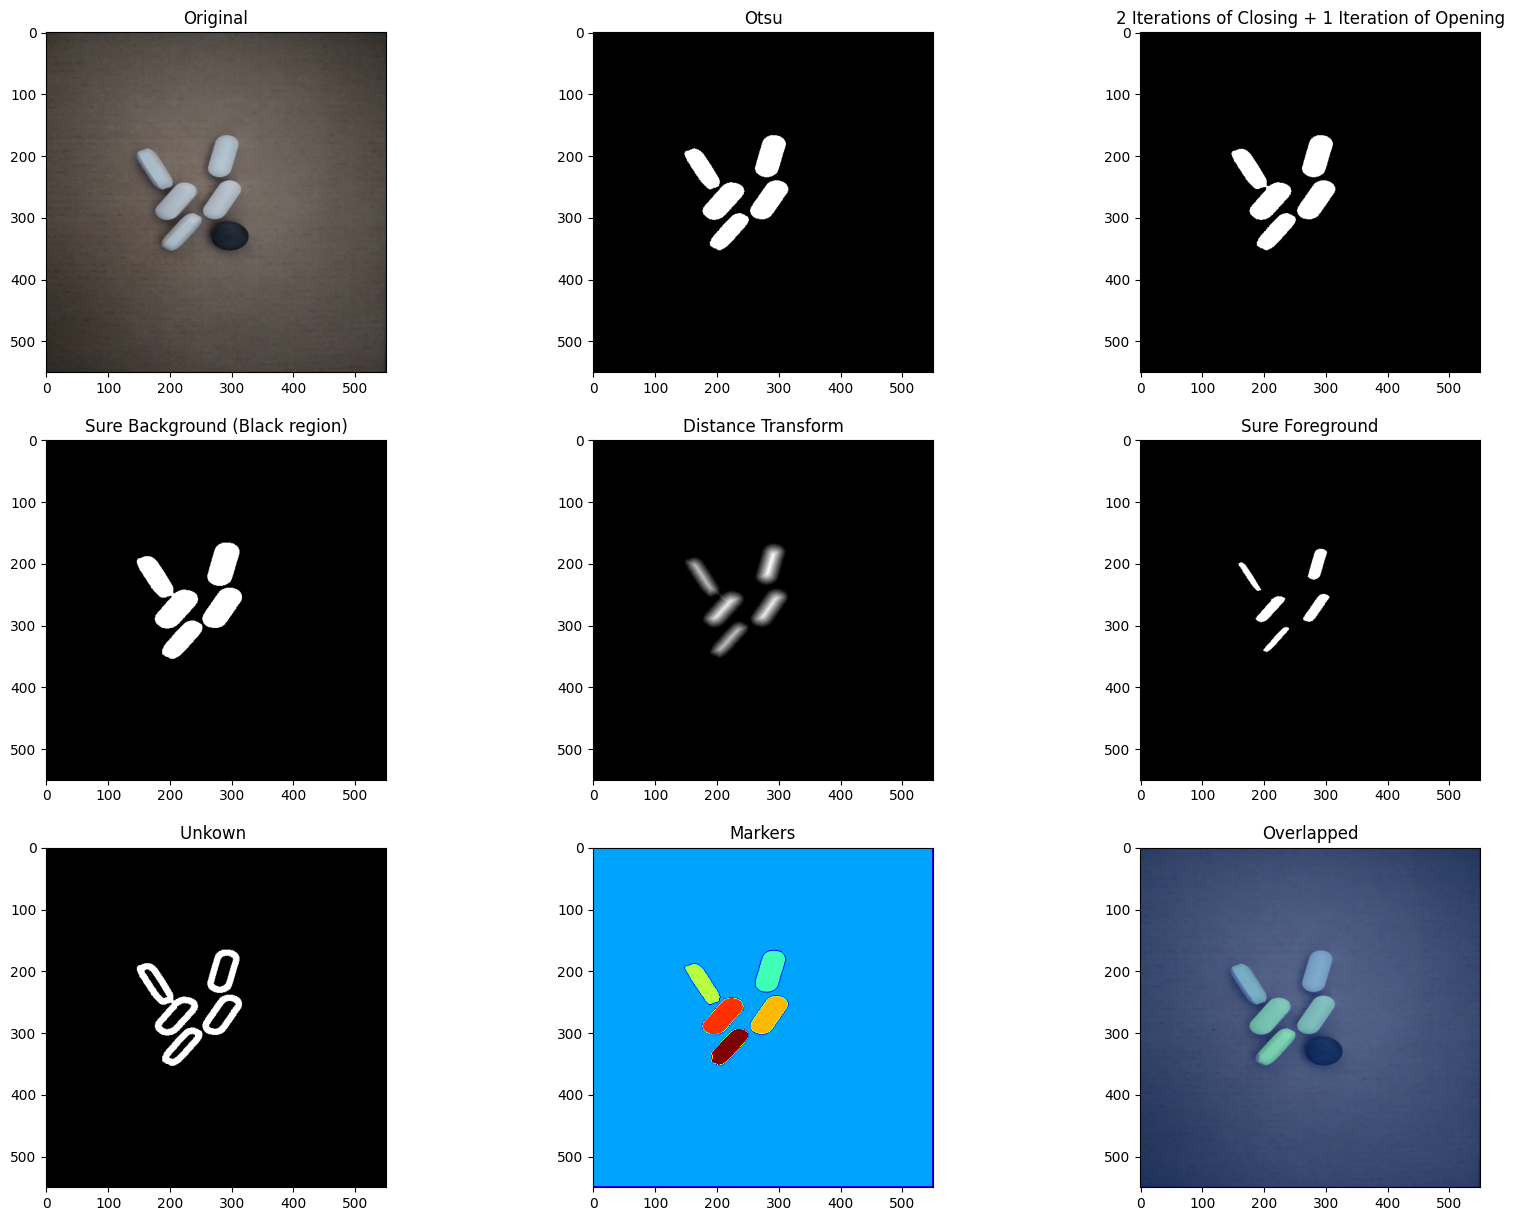

In [ ]:
stock = stock_pastillas("pastilla_negra.jpg")

In [ ]:
print("El numero de pastillas en la imagen es de: "+str(stock))

El numero de pastillas en la imagen es de: 6
